# Семинар 2 – Линейные модели

In [1]:
import pandas as pd
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
import scipy.stats as st
from utils import print_cv_results
import warnings
warnings.simplefilter('ignore')

Сгенерируем исскуственные данные, на основе функции:
$$f(x) = 4x+5$$

In [2]:
def lin_function(x):
    return 4*x+5

x_true = np.array([-2,2])
y_true = lin_function(x_true)

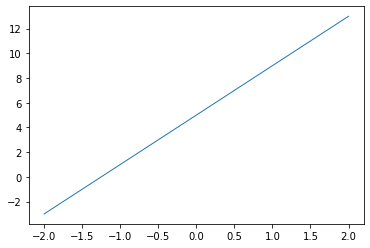

In [3]:
plt.plot(x_true, y_true, linewidth=1)
plt.show()

In [4]:
n = 100
x = np.random.rand(n,1)*4-2
e = np.random.rand(n,1)*4-2
y = lin_function(x) + e

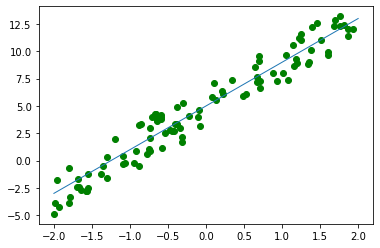

In [5]:
plt.scatter(x, y, color='g')
plt.plot(x_true, y_true, linewidth=1)
plt.show()

# Аналитический метод
$$\hat \theta = \bigl(X^T \cdot X  \bigr)^{-1} \cdot X^T \cdot y $$

In [6]:
x_matrix = np.c_[np.ones((n,1)),x]

In [7]:
%%time
thetha_matrix = # Ваш код здесь:

CPU times: user 1.26 ms, sys: 997 µs, total: 2.25 ms
Wall time: 975 µs


In [8]:
thetha_matrix.T[0].tolist()

[4.902859968764383, 4.109397024736308]

In [9]:
print("Свободный член: {[0][0]:.7}".format(thetha_matrix.T))
print("Коэфициент: {[0][1]:.7}".format(thetha_matrix.T))

Свободный член: 4.90286
Коэфициент: 4.109397


In [10]:
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import LinearRegression

In [11]:
%%time
lr = LinearRegression()
lr.fit(x,y);

CPU times: user 10.1 ms, sys: 1.35 ms, total: 11.4 ms
Wall time: 5.13 ms


LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [12]:
print("Свободный член: {:.7}".format(lr.intercept_[0]))
print("Коэфициент: {:.7}".format(lr.coef_[0][0]))

Свободный член: 4.90286
Коэфициент: 4.109397


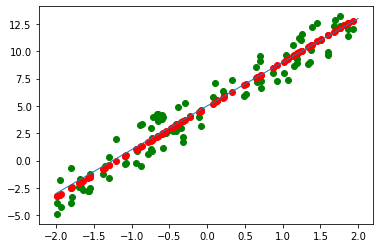

In [13]:
plt.scatter(x, y, color='g')
plt.scatter(x, lr.predict(x), color='r')
plt.plot(x_true, y_true, linewidth=1)
plt.show()

# Пакетный градиентный спуск

$$\nabla MSE(\theta)= \frac{2}{l} X^T \cdot \bigl(X \cdot \theta - y \bigr) $$

### Реализация в numpy

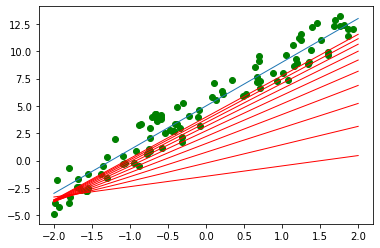

[[4.90285997]
 [4.10939702]]
CPU times: user 161 ms, sys: 5.9 ms, total: 167 ms
Wall time: 165 ms


In [14]:
%%time
eta = 0.1  # learning rate
n_iterations = 100


theta = np.random.randn(2,1)  # random initialization

plt.scatter(x, y, color='g')

for iteration in range(n_iterations):
    if iteration < 10:
        plt.plot(x_true, x_true*theta[1]+theta[0], linewidth=1, color='r')
    gradients = # Ваш код здесь:
    theta = # Ваш код здесь:

plt.plot(x_true, y_true, linewidth=1)
plt.show()

print(theta)

### Слишком маленький шаг обучения (learning rate)

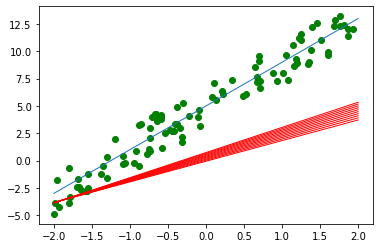

In [15]:
eta = 0.01  # learning rate
n_iterations = 100


theta = np.random.randn(2,1)  # random initialization

plt.scatter(x, y, color='g')

for iteration in range(n_iterations):
    if iteration < 10:
        plt.plot(x_true, x_true*theta[1]+theta[0], linewidth=1, color='r')
    gradients = # Ваш код здесь:
    theta = # Ваш код здесь:

plt.plot(x_true, y_true, linewidth=1)
plt.show()

### Слишком большой шаг обучения (learning rate)

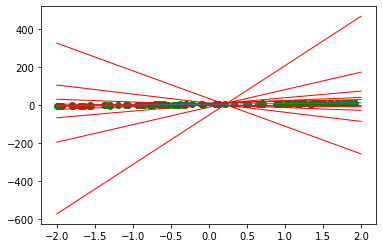

In [16]:
eta = 1.01  # learning rate
n_iterations = 100


theta = np.random.randn(2,1)  # random initialization

plt.scatter(x, y, color='g')

for iteration in range(n_iterations):
    if iteration < 10:
        plt.plot(x_true, x_true*theta[1]+theta[0], linewidth=1, color='r')
    gradients = # Ваш код здесь:
    theta = # Ваш код здесь:

plt.plot(x_true, y_true, linewidth=1)
plt.show()

# Уменьшение шага на каждой итерации

In [17]:
eta = 1  # learning rate
n_iterations = 1000

theta = np.random.randn(2,1)  # random initialization

for iteration in range(n_iterations):
    gradients = # Ваш код здесь:
    theta = theta - (eta/(iteration+1)) * gradients


print(theta)

[[4.90286044]
 [4.10939713]]


Learning rate - гипперпараметр, и можно воспользоваться GridSearchCV, однако чтобы не учить каждый раз такое кол-во итераций, мы можем измерять норму градиента, и прекращать спуск, когда он "затух"

In [18]:
eta = 0.1  # learning rate
n_iterations = 1000
tol = 0.00001

theta = np.random.randn(2,1)  # random initialization

for iteration in range(n_iterations):
    gradients = # Ваш код здесь:
    if # Ваш код здесь:
        break
    theta = # Ваш код здесь:

print('Градиент затух на {} итерации '.format(iteration))
print(theta)

Градиент затух на 63 итерации 
[[4.9028554 ]
 [4.10939589]]


__Реализация в Scikit-Learn отсутствует__
  
  
# Cтохастический градиентный спуск  

In [19]:
n_epochs = 50

def learning_schedule(t):
    return t0 / (t + t1)

t0, t1 = 5, 100  # learning schedule hyperparameters


theta = np.random.randn(2,1)  # random initialization

for epoch in range(n_epochs):
    for i in range(n):
        random_index = np.random.randint(n)
        xi = x_matrix[random_index:random_index+1]
        yi = y[random_index:random_index+1]
        gradients = # Ваш код здесь:
        eta = learning_schedule(epoch * n + i)
        theta = theta - eta * gradients
print(theta)

[[4.89732729]
 [4.13442093]]


In [20]:
from sklearn.linear_model import SGDRegressor

In [21]:
sgd = SGDRegressor(tol=0.0001)
#The stopping criterion. If it is not None, the iterations will stop when (loss > previous_loss - tol).
sgd.fit(x,y)
sgd.intercept_, sgd.coef_

(array([4.89046618]), array([4.10426953]))

### Функции потерь в регрессии

In [22]:
with open('data_preprocessed.json') as file:
    X = pd.read_json(file)

In [23]:
X_subset = X[[7, 15]].values
# Добавим два выброса
X_subset_modified = np.vstack((X_subset, [[1, 90], [2, 50]]))

In [24]:
def scatter_points_and_plot_line_MSE(X_subset):
    plt.scatter(X_subset[:, 0], X_subset[:, 1])
    lr = LinearRegression()
    lr.fit(X_subset[:, 0][:, None], X_subset[:, 1])
    grid = np.linspace(0, 2, 100)
    line = lr.predict(grid[:, None])
    plt.plot(grid, line)

Text(0.5, 0, 'x')

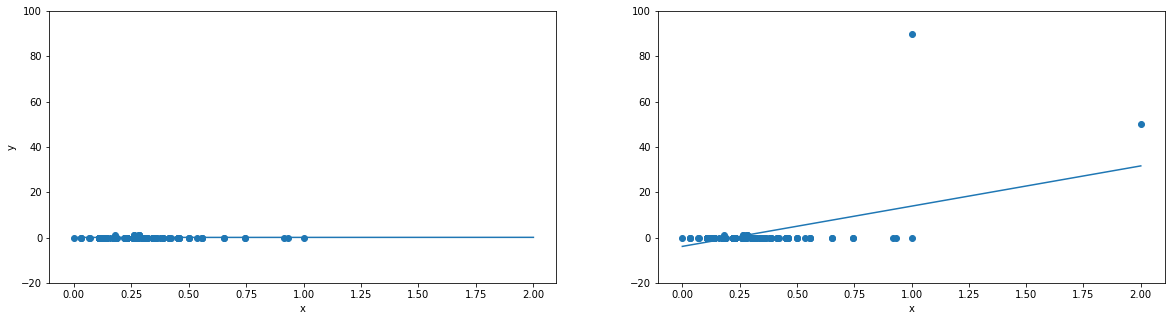

In [25]:
plt.figure(figsize=(20, 5))
plt.subplot(1, 2, 1)
scatter_points_and_plot_line_MSE(X_subset)
plt.ylim(-20, 100)
plt.xlabel("x")
plt.ylabel("y")
plt.subplot(1, 2, 2)
scatter_points_and_plot_line_MSE(X_subset_modified)
plt.ylim(-20, 100)
plt.xlabel("x")

Из-за шумовых объектов прямая достаточно сильно изменила наклон. Поэтому вместо MSE часто используют Mean Absoulte Error:
$$L(y_i, a(x_i)) = |y_i - a(x_i)|$$

Теперь обучим регрессию, оптимизируя MAE. В sklearn такая регрессия не реализована, но можно использовать модуль statsmodels

In [26]:
# !pip install statsmodels==0.11.1
import statsmodels.api as sm
import statsmodels.formula.api as smf

Text(0.5, 0, 'x')

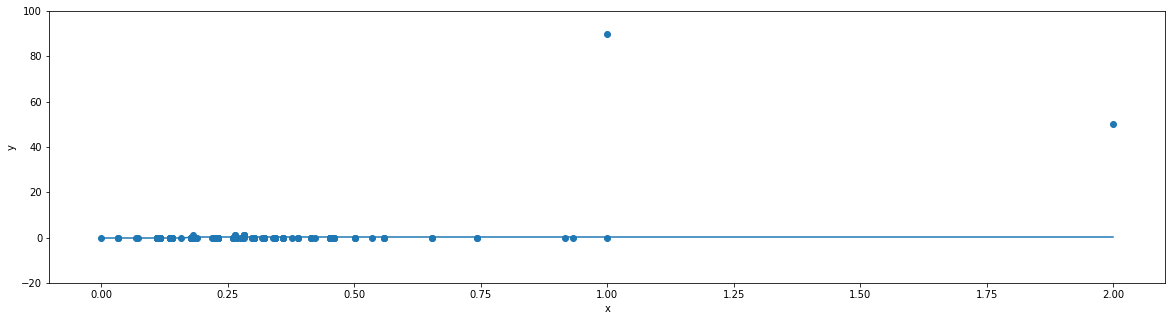

In [27]:
plt.figure(figsize=(20, 5))
plt.ylabel("y")
mod = smf.quantreg('f15 ~ f7', pd.DataFrame(data=X_subset_modified, columns=["f7", "f15"])) # задаеем зависимость и передаем данные
res = mod.fit(q=0.5)
plt.scatter(X_subset_modified[:, 0], X_subset_modified[:, 1])   # визуализируем точки
grid = np.linspace(0, 2, 100)
plt.plot(grid, grid * res.params["f7"] + res.params["Intercept"])   # визуализируем прямую
plt.ylim(-20, 100)
plt.xlabel("x")

Прямая не изменила направление из-за выбросов.

Попробуем добавить больше шумовых объектов:

In [28]:
X_subset_modified_twice = np.vstack((
    X_subset_modified, 
    np.random.randint(5, size=60).reshape(-1, 2) * [1, 30],
))

Text(0.5, 0, 'x')

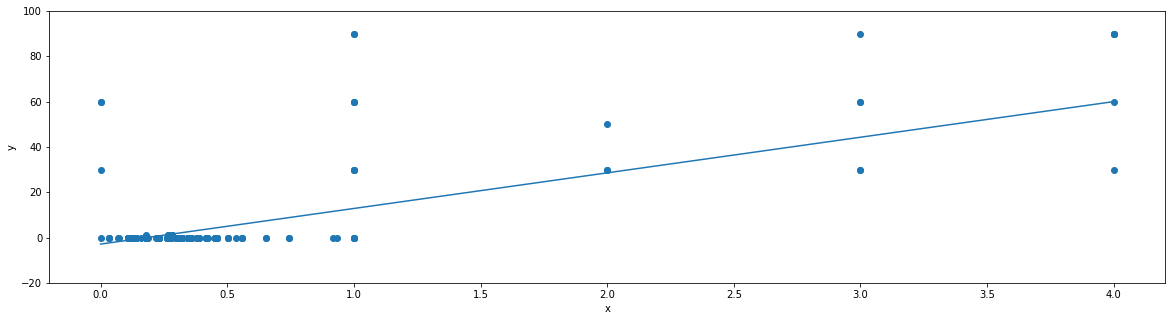

In [29]:
plt.figure(figsize=(20, 5))
plt.ylabel("y")
mod = smf.quantreg('f15 ~ f7', pd.DataFrame(data=X_subset_modified_twice, columns=["f7", "f15"])) # задаеем зависимость и передаем данные
res = mod.fit(q=0.5)
plt.scatter(X_subset_modified_twice[:, 0], X_subset_modified_twice[:, 1])   # визуализируем точки
grid = np.linspace(0, 4, 200)
plt.plot(grid, grid * res.params["f7"] + res.params["Intercept"])   # визуализируем прямую
plt.ylim(-20, 100)
plt.xlabel("x")

Прямая изменила наклон, когда мы добавили 30 (почти 15%) шумовых точек.

## Мультиколлинеарность и регуляризация

In [30]:
# !pip install seaborn
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

Для оценка качества работы наших алгоритмов будем использовать коэфициент детерминации:

$$R^2 = 1 - \frac{\sum_i (y_i - a(x_i))^2}{\sum_i (y_i - \overline{y}_i)^2}$$


#### Решение задачи МНК

In [31]:
def my_linear_regression(X_train, Y_train):
    return np.linalg.inv(X_train.T.dot(X_train)).dot(X_train.T).dot(y_train)

In [32]:
def predict(X, w):
    return np.dot(X, w)

#### Загрузим датасет

https://habrahabr.ru/post/206306/

In [33]:
data = pd.read_csv('energy_efficiency.csv')

Для примера решения задачи прогнозирования, я взял набор данных Energy efficiency из крупнейшего репозитория UCI.   

В нем $X_1 ... X_8$ — характеристики помещения на основании которых будет проводиться анализ, а $y_1,y_2$ — значения нагрузки, которые надо спрогнозировать.
- $X_1$	Относительная компактность
- $X_2$	Площадь
- $X_3$	Площадь стен
- $X_4$	Площадь потолка	
- $X_5$	Общая высота	
- $X_6$	Ориентация
- $X_7$	Площадь остекления	
- $X_8$	Распределенная площадь остекления	
- $y_1$	Нагрузка при обогреве
- $y_2$	Нагрузка при охлаждении

In [34]:
data.head()

,X1,X2,X3,X4,X5,X6,X7,X8,Y1,Y2
0,0.98,514.5,294.0,110.25,7.0,2,0.0,0,15.55,21.33
1,0.98,514.5,294.0,110.25,7.0,3,0.0,0,15.55,21.33
2,0.98,514.5,294.0,110.25,7.0,4,0.0,0,15.55,21.33
3,0.98,514.5,294.0,110.25,7.0,5,0.0,0,15.55,21.33
4,0.90,563.5,318.5,122.50,7.0,2,0.0,0,20.84,28.28


#### Посмотрим на скоррелированность данных

In [35]:
data.corr()

,X1,X2,X3,X4,X5,X6,X7,X8,Y1,Y2
X1,1.000000e+00,-9.919015e-01,-2.037817e-01,-8.688234e-01,8.277473e-01,0.000000,1.283986e-17,1.764620e-17,0.622272,0.634339
X2,-9.919015e-01,1.000000e+00,1.955016e-01,8.807195e-01,-8.581477e-01,0.000000,1.318356e-16,-3.558613e-16,-0.658120,-0.672999
X3,-2.037817e-01,1.955016e-01,1.000000e+00,-2.923165e-01,2.809757e-01,0.000000,-7.969726e-19,0.000000e+00,0.455671,0.427117
X4,-8.688234e-01,8.807195e-01,-2.923165e-01,1.000000e+00,-9.725122e-01,0.000000,-1.381805e-16,-1.079129e-16,-0.861828,-0.862547
X5,8.277473e-01,-8.581477e-01,2.809757e-01,-9.725122e-01,1.000000e+00,0.000000,1.861418e-18,0.000000e+00,0.889430,0.895785
X6,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.000000,0.000000e+00,0.000000e+00,-0.002587,0.014290
X7,1.283986e-17,1.318356e-16,-7.969726e-19,-1.381805e-16,1.861418e-18,0.000000,1.000000e+00,2.129642e-01,0.269842,0.207505
X8,1.764620e-17,-3.558613e-16,0.000000e+00,-1.079129e-16,0.000000e+00,0.000000,2.129642e-01,1.000000e+00,0.087368,0.050525
Y1,6.222719e-01,-6.581199e-01,4.556714e-01,-8.618281e-01,8.894305e-01,-0.002587,2.698417e-01,8.736846e-02,1.000000,0.975862
Y2,6.343391e-01,-6.729989e-01,4.271170e-01,-8.625466e-01,8.957852e-01,0.014290,2.075050e-01,5.052512e-02,0.975862,1.000000


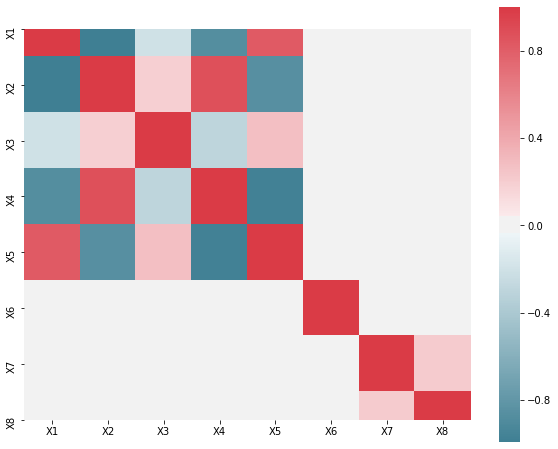

In [36]:
f, ax = plt.subplots(figsize=(10, 8))
corr = data.drop(['Y1','Y2'], axis=1).corr()
sns.heatmap(corr, square=True, ax=ax, cmap=sns.diverging_palette(220, 10, as_cmap=True))

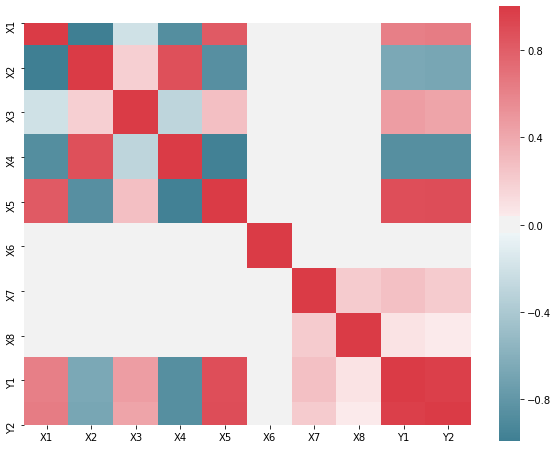

In [37]:
f, ax = plt.subplots(figsize=(10, 8))
corr = data.corr()
sns.heatmap(corr, square=True, ax=ax, cmap=sns.diverging_palette(220, 10, as_cmap=True))

Видим, что x1 скоррелирован с x2, а x4 с x5. Из-за этого матрица $X^{T}*X$ необратима.

#### Посмотрим как на таких данных отработает наша линейная регрессия

Разобьем выборку на train и test

In [38]:
X = data.drop(['Y1','Y2'], axis=1)
y = data['Y1']

In [39]:
X.shape, y.shape

((768, 8), (768,))

In [40]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

Обучим регрессию и посмотрим на качество

In [41]:
w = my_linear_regression(X_train, y_train)

In [42]:
y_train_pred = predict(X_train, w)
print("Train MSE: ", mean_squared_error(y_train, y_train_pred))
print("Train R2: ", r2_score(y_train, y_train_pred))

Train MSE:  417168.2213821891
Train R2:  -4132.492369591635


In [43]:
y_test_pred = predict(X_test, w)
print("Test MSE: ", mean_squared_error(y_test, y_test_pred))
print("Test R2: ", r2_score(y_test, y_test_pred))

Test MSE:  460128.72662043874
Test R2:  -4413.449687872916


Как-то не очень

#### Попробуем убрать скоррелированные признаки

In [44]:
X = # Ваш код здесь:
y = # Ваш код здесь:

In [45]:
X.shape, y.shape

((768, 6), (768,))

In [46]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

Обучим регрессию и посмотрим на качество

In [47]:
w = my_linear_regression(X_train, y_train)

In [48]:
y_train_pred = predict(X_train, w)
print("Train MSE: ", mean_squared_error(y_train, y_train_pred))
print("Train R2: ", r2_score(y_train, y_train_pred))

Train MSE:  9.851958700759099
Train R2:  0.9023823147885197


In [49]:
y_test_pred = predict(X_test, w)
print("Test MSE: ", mean_squared_error(y_test, y_test_pred))
print("Test R2: ", r2_score(y_test, y_test_pred))

Test MSE:  11.387213360639421
Test R2:  0.8907517015187721


Юху! Получили алгоритм с хорошим качеством

#### Реализуем линейную регрессию с L2 регуляризацией

In [50]:
def my_linear_regression(X_train, Y_train, l2=0):
    return np.linalg.inv(X_train.T.dot(X_train) + l2*np.eye(X_train.shape[1])).dot(X_train.T).dot(y_train)

Обучим регрессию с регуляризацией и посмотрим на качество

In [51]:
X = data.drop(['Y1','Y2'], axis=1)
y = data['Y1']

In [52]:
X.shape, y.shape

((768, 8), (768,))

In [53]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [54]:
w = my_linear_regression(X_train, y_train, l2=0.001)

In [55]:
y_train_pred = predict(X_train, w)
print("Train MSE: ", mean_squared_error(y_train, y_train_pred))
print("Train R2: ", r2_score(y_train, y_train_pred))

Train MSE:  8.566900337804904
Train R2:  0.9151152571975837


In [56]:
y_test_pred = predict(X_test, w)
print("Test MSE: ", mean_squared_error(y_test, y_test_pred))
print("Test R2: ", r2_score(y_test, y_test_pred))

Test MSE:  9.4639612678421
Test R2:  0.9092032762837478


Этого же эффекта(отсутствие переобучения) добились добавив регуляризацию

# Линейные модели для задачи классификации
В качестве демонстрации будем использовальзовать датасет с изображениями цифр 

In [57]:
# Загрузим данные
from sklearn.datasets import load_digits
digits = load_digits()

In [58]:
X = digits.data
y = digits.target

In [59]:
# Посмотрим на кол-во объектов 
X.shape, y.shape

((1797, 64), (1797,))

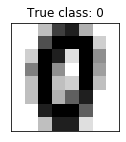

In [60]:
# Давайте, посмотрим, как вылядит случайный объект нашей выборки
target_image_id = np.random.randint(X.shape[0])

plt.figure(figsize=(4,2))
plt.imshow(X[target_image_id].reshape((8, 8)), cmap='binary')
plt.xticks([])
plt.yticks([])
plt.title('True class: '+ str(y[target_image_id]))
plt.show()

In [61]:
# Посмотрим на баланс классов 
class_counts = np.unique(y, return_counts=True)

pd.DataFrame(class_counts[1], index=class_counts[0], columns=['Counts'])

,Counts
0,178
1,182
2,177
3,183
4,181
5,182
6,181
7,179
8,174
9,180


## Логистическая регрессия для многоклассовой классификации

In [62]:
# Загрузим нужные библиотеки
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.model_selection import GridSearchCV

In [63]:
# Разделим выборку на тренировочную и тестовую 
x_train, x_test, y_train, y_test = train_test_split(X, y, 
                 train_size=0.8, test_size=0.2, shuffle=True,
                 random_state=42)

x_train.shape, x_test.shape, y_train.shape, y_test.shape

((1437, 64), (360, 64), (1437,), (360,))

*Логистическая регрессия позволяет решать задачу многоклассовой классификации. Класс ``LogisticRegression`` позвляет это делать двумя способами:* 
- Стандартный One vs Rest (т.е. каждый класс отделяется от всех других). Параметр `multi_class='ovr'`.*
- Используя кросс-энтропию (оценивается сразу вектор вероятностей принадлежности классам). Параметр `multi_class='multinomial'`.*

#### One vs Rest
Find 𝐾 − 1 classifiers 𝑓 , 𝑓 , ... , 𝑓 12 𝐾−1  
- 𝑓 classifies1𝑣𝑠{2,3,...,𝐾} 1
- 𝑓 classifies2𝑣𝑠{1,3,...,𝐾} 2
- ...
- 𝑓 classifies𝐾−1𝑣𝑠{1,2,...,𝐾−2}
- 𝐾−1
- Points not classified to classes {1,2, ... , 𝐾 − 1} are put to class 𝐾

#### Cross-entropy


В случае с бинарной классификацией функция потерь: 
$$ \sum_{i=1}^l \bigl( y_i \log a_i - (1-y_i) \log (1-a_i) \bigr)  \rightarrow min$$  
$a_i$ – ответ (вероятность) алгоритма на i-м объекте на вопрос принадлежности к классу $y_i$

Обобщается для многомерного случая:
$$-\frac{1}{q} \sum_{i=1}^q \sum_{j=1}^l y_{ij} \log a_{ij} \rightarrow min $$
где  
$q$ – число элементов в выборке,  
$l$ – число классов,   
$a_{ij}$ – ответ (вероятность) алгоритма на i-м объекте на вопрос принадлежности его к j-му классу

__Проблемы:__ 

- Сложности в поиске глобального минимума, так как присутствуют Локальные минимумы и плато

In [64]:
%%time
lr = LogisticRegression(solver='liblinear', multi_class='ovr')
lr.fit(x_train,y_train)

CPU times: user 151 ms, sys: 2.09 ms, total: 154 ms
Wall time: 152 ms


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='ovr', n_jobs=None, penalty='l2',
                   random_state=None, solver='liblinear', tol=0.0001, verbose=0,
                   warm_start=False)

In [65]:
accuracy_score(lr.predict(x_test), y_test)

0.9611111111111111

<img src="pic/solvers_ovr.png" alt="Drawing" style="width: 600px;"/>
  
Source: [User Guide](https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression)

# liblinear 
Используется обычный покоординантный спуск. 
Алгоритм:
- Инициализацируем любыми значениями вектор весов
    - Повторяем для каждого i из пространства признаков:
        - фиксируем значения всех переменных кроме $x_i$
        - проводим одномерную оптимизацию по переменной $x_i$, любым методом одномерной оптимизации
        - если достигнули минимума по одной координате, то возвращаем текущее значение вектора весов

Как это выглядит? 
<img src="pic/Coordinate_descent.png" alt="Drawing" style="width: 400px;"/>

__Недостатки:__
- Не параллелится 
- Может "застрять" в локальном минимуме
- Следствие п.2 - Не может использоваться кросс-энтропия для многомерного случая, так как легко "Застревает" в локальных минимумах. Вместо этого для каждого класса строит отдельный классификатор (One-vs-Rest) 

In [66]:
%%time
len_c = 10
param_grid={
    'C': np.linspace(0.01, 1, len_c), 
    'penalty': ['l1', 'l2']
    }

gs=GridSearchCV(lr,param_grid=param_grid, cv=3,
                n_jobs=-1, scoring='accuracy') 
gs.fit(x_train, y_train)

CPU times: user 344 ms, sys: 101 ms, total: 445 ms
Wall time: 4.1 s


GridSearchCV(cv=3, error_score='raise-deprecating',
             estimator=LogisticRegression(C=1.0, class_weight=None, dual=False,
                                          fit_intercept=True,
                                          intercept_scaling=1, l1_ratio=None,
                                          max_iter=100, multi_class='ovr',
                                          n_jobs=None, penalty='l2',
                                          random_state=None, solver='liblinear',
                                          tol=0.0001, verbose=0,
                                          warm_start=False),
             iid='warn', n_jobs=-1,
             param_grid={'C': array([0.01, 0.12, 0.23, 0.34, 0.45, 0.56, 0.67, 0.78, 0.89, 1.  ]),
                         'penalty': ['l1', 'l2']},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring='accuracy', verbose=0)

In [67]:
accuracy_score(gs.predict(x_test), y_test)

0.9638888888888889

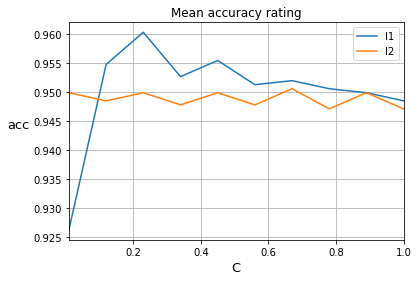

In [68]:
print_cv_results(gs.cv_results_['mean_test_score'],
                 len_c, gs.get_params(), 'C','penalty')

### Почему L1 штраф не применяется для градиентных методов? 

По сути, мы добавляем сумму модулей весов к функции потерь, но как Вы знаете, производная функции модуля при x = 0 не определена, поэтому, возникают сложности с градиентными методами. 



### Stochatic Average Gradient (SAG)
Объединение градиентного спуска и стохастического. 
При этом, он имеет низкую стоимость итерации свойственной SGD, но делает шаг градиента по отношению к аппроксимации полного градиента:
<img src="pic/sag.png" alt="Drawing" style="width: 500px;"/>



__Недостатки:__
- Нет L1
- Непрактичен для больших выборок, так как имеет высокую вычислительную сложность

# Stochatic Average Gradient Augmented (SAGA)

SAGA является вариантом SAG, но который поддерживает опцию non-smooth penalty=l1 (т. е. регуляризацию L1).

[Подробнее: ](https://www.di.ens.fr/~fbach/Defazio_NIPS2014.pdf)

In [69]:
lr_clf = LogisticRegression(solver='saga', multi_class='multinomial', max_iter=1500)

In [70]:
%%time
gs=GridSearchCV(lr_clf,param_grid=param_grid, cv=3,
                n_jobs=-1, scoring='accuracy') 
gs.fit(x_train, y_train)

CPU times: user 752 ms, sys: 75.6 ms, total: 828 ms
Wall time: 59.8 s


GridSearchCV(cv=3, error_score='raise-deprecating',
             estimator=LogisticRegression(C=1.0, class_weight=None, dual=False,
                                          fit_intercept=True,
                                          intercept_scaling=1, l1_ratio=None,
                                          max_iter=1500,
                                          multi_class='multinomial',
                                          n_jobs=None, penalty='l2',
                                          random_state=None, solver='saga',
                                          tol=0.0001, verbose=0,
                                          warm_start=False),
             iid='warn', n_jobs=-1,
             param_grid={'C': array([0.01, 0.12, 0.23, 0.34, 0.45, 0.56, 0.67, 0.78, 0.89, 1.  ]),
                         'penalty': ['l1', 'l2']},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring='accuracy', verbose=0)

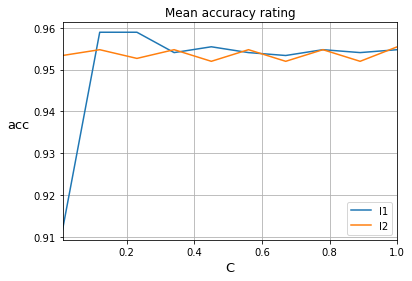

In [71]:
print_cv_results(gs.cv_results_['mean_test_score'],
                 len_c, gs.get_params(), 'C','penalty')

In [72]:
accuracy_score(gs.predict(x_test), y_test)

0.975

# Что почитать: 
- [Regularized Logistic Regression is Strictly Convex](http://www.qwone.com/~jason/writing/convexLR.pdf)
- [SAGA: A Fast Incremental Gradient Method With Support for Non-Strongly Convex Composite Objectives
](https://www.di.ens.fr/~fbach/Defazio_NIPS2014.pdf)
- [Лекции Евгения Соколова](https://github.com/esokolov/ml-course-hse/tree/master/2018-fall/lecture-notes)